In [1]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.optim import lr_scheduler
from PIL import Image, ImageFile

In [2]:
!unzip /content/train_elephants.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/train_elephants/._ASG00184yz_2.jpeg  
  inflating: train_elephants/ASG001bce1_2.jpeg  
  inflating: __MACOSX/train_elephants/._ASG001bce1_2.jpeg  
  inflating: train_elephants/ASG00178gd_0.jpeg  
  inflating: __MACOSX/train_elephants/._ASG00178gd_0.jpeg  
  inflating: train_elephants/ASG001bzv1_1.jpeg  
  inflating: __MACOSX/train_elephants/._ASG001bzv1_1.jpeg  
  inflating: train_elephants/ASG001b4sj_2.jpeg  
  inflating: __MACOSX/train_elephants/._ASG001b4sj_2.jpeg  
  inflating: train_elephants/ASG0014nyd_0.jpeg  
  inflating: __MACOSX/train_elephants/._ASG0014nyd_0.jpeg  
  inflating: train_elephants/ASG001eorv_1.jpeg  
  inflating: __MACOSX/train_elephants/._ASG001eorv_1.jpeg  
  inflating: train_elephants/ASG00192o3_0.jpeg  
  inflating: __MACOSX/train_elephants/._ASG00192o3_0.jpeg  
  inflating: train_elephants/ASG00186rt_1.jpeg  
  inflating: __MACOSX/train_elephants/._ASG00186rt_1.jpeg  
  inflating: trai

In [3]:
!unzip /content/train_zebras.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/train_zebras/._ASG001enfq_2.jpeg  
  inflating: train_zebras/ASG001dwc2_2.jpeg  
  inflating: __MACOSX/train_zebras/._ASG001dwc2_2.jpeg  
  inflating: train_zebras/ASG001fw87_2.jpeg  
  inflating: __MACOSX/train_zebras/._ASG001fw87_2.jpeg  
  inflating: train_zebras/ASG001eq5m_2.jpeg  
  inflating: __MACOSX/train_zebras/._ASG001eq5m_2.jpeg  
  inflating: train_zebras/ASG001e0xy_2.jpeg  
  inflating: __MACOSX/train_zebras/._ASG001e0xy_2.jpeg  
  inflating: train_zebras/ASG001dw9w_1.jpeg  
  inflating: __MACOSX/train_zebras/._ASG001dw9w_1.jpeg  
  inflating: train_zebras/ASG001eqtj_2.jpeg  
  inflating: __MACOSX/train_zebras/._ASG001eqtj_2.jpeg  
  inflating: train_zebras/ASG001e1jg_0.jpeg  
  inflating: __MACOSX/train_zebras/._ASG001e1jg_0.jpeg  
  inflating: train_zebras/ASG001e0ol_1.jpeg  
  inflating: __MACOSX/train_zebras/._ASG001e0ol_1.jpeg  
  inflating: train_zebras/ASG001fw4i_1.jpeg  
  inflating: __MACOSX/

In [4]:
!unzip /content/test.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/ASG001c49d_1.jpeg  
  inflating: __MACOSX/test/._ASG001c49d_1.jpeg  
  inflating: test/ASG001e1nl_1.jpeg  
  inflating: __MACOSX/test/._ASG001e1nl_1.jpeg  
  inflating: test/ASG001ekd1_0.jpeg  
  inflating: __MACOSX/test/._ASG001ekd1_0.jpeg  
  inflating: test/ASG001e1ot_0.jpeg  
  inflating: __MACOSX/test/._ASG001e1ot_0.jpeg  
  inflating: test/ASG001e0q4_1.jpeg  
  inflating: __MACOSX/test/._ASG001e0q4_1.jpeg  
  inflating: test/ASG001f5ss_2.jpeg  
  inflating: __MACOSX/test/._ASG001f5ss_2.jpeg  
  inflating: test/ASG00165o3_2.jpeg  
  inflating: __MACOSX/test/._ASG00165o3_2.jpeg  
  inflating: test/ASG0018xkt_0.jpeg  
  inflating: __MACOSX/test/._ASG0018xkt_0.jpeg  
  inflating: test/ASG001e0nl_1.jpeg  
  inflating: __MACOSX/test/._ASG001e0nl_1.jpeg  
  inflating: test/ASG0017d5m_0.jpeg  
  inflating: __MACOSX/test/._ASG0017d5m_0.jpeg  
  inflating: test/ASG001ct1d_1.jpeg  
  inflating: __MACOSX/test/._ASG001ct1d_1

In [5]:
datadir= "]/content/animalsclass"


## **Train model without regularization and augumentation**

In [6]:
train_transforms = transforms.Compose([transforms.Resize((224,224)),
                                      
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])
train_transforms2 = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.RandomHorizontalFlip(p=1),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])
                                      
test_transforms = transforms.Compose([transforms.Resize((224,224)),
                                      
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])
train_data = datasets.ImageFolder('/content/animalsclass/train', transform=train_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
train_data2= datasets.ImageFolder("/content/animalsclass/train", transform=train_transforms2)

trainloader2 = torch.utils.data.DataLoader(train_data2, batch_size=32, shuffle=True)
test_data = datasets.ImageFolder('/content/animalsclass/test', transform=test_transforms)

testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

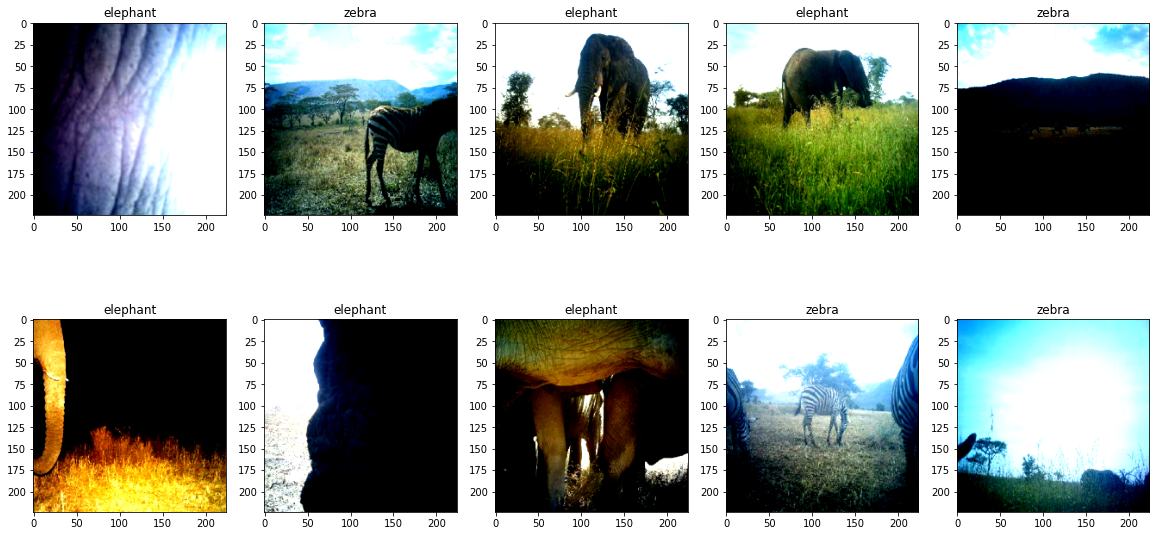

In [7]:
def image_convert(img):
    img = img.clone().cpu().numpy()
    img = img.transpose(1,2,0)
    std = [0.5,0.5,0.5]
    mean = [0.5,0.5,0.5]
    img = img*std + mean
    return img
def plot_10():
        iter_ = iter(trainloader)
        images,labels = next(iter_)
        an_ = {'0':'elephant','1':'zebra'}
        
        plt.figure(figsize=(20,10))
        for idx in range(10):
            plt.subplot(2,5,idx+1)
            img = image_convert(images[idx])
            label = labels[idx]
            plt.imshow(img)
            plt.title(an_[str(label.numpy())])
        plt.show()
        
plot_10()

In [8]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc1 = nn.Linear(3*3*64,10)
        self.fc2 = nn.Linear(10,2)
        self.relu = nn.ReLU()
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0),-1)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out
          
         
         
model = NeuralNetwork()

## **Model with dropout applied**




In [9]:
class NeuralNetwork2(nn.Module):
    def __init__(self):
        super(NeuralNetwork2,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc1 = nn.Linear(3*3*64,10)
        self.fc2 = nn.Linear(10,2)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()
    def forward(self,x):
        out = self.layer1(x)
        out = self.dropout(out)
        out = self.layer2(out)
        out = self.dropout(out)
        out = self.layer3(out)
        out = self.dropout(out)
        out = out.view(out.size(0),-1)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out
          
         
         
model2 = NeuralNetwork2()

In [10]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
optimizer2 = torch.optim.Adam(model2.parameters(), lr=1e-4, weight_decay=1e-5)

In [14]:
model2.to(device)

NeuralNetwork2(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=576, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
  (dropout): Dropout(p=0.5, inplace=F

In [13]:

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


In [ ]:
model.to(device)

NeuralNetwork(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=576, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
  (relu): ReLU()
)

In [15]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [16]:
def train_loop2(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        l1_lambda = 0.001
        l1_norm = sum(p.abs().sum() for p in model.parameters())

        loss = loss + l1_lambda * l1_norm

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [23]:
def train_loop3(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        l2_lambda = 0.01
        l2_reg = torch.tensor(0.)
        for param in model.parameters():
          l2_reg += torch.norm(param)
          loss += l2_lambda * l2_reg

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [17]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(trainloader, model, loss_fn, optimizer)
    test_loop(testloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.163355  [    0/13999]
loss: 0.241021  [ 3200/13999]
loss: 0.112489  [ 6400/13999]
loss: 0.124185  [ 9600/13999]
loss: 0.137904  [12800/13999]
Test Error: 
 Accuracy: 50.6%, Avg loss: 3.198810 

Epoch 2
-------------------------------
loss: 0.032737  [    0/13999]
loss: 0.010624  [ 3200/13999]
loss: 0.045744  [ 6400/13999]
loss: 0.010208  [ 9600/13999]
loss: 0.100944  [12800/13999]
Test Error: 
 Accuracy: 49.7%, Avg loss: 3.991968 

Epoch 3
-------------------------------
loss: 0.176038  [    0/13999]
loss: 0.035527  [ 3200/13999]
loss: 0.054705  [ 6400/13999]
loss: 0.135348  [ 9600/13999]
loss: 0.044225  [12800/13999]
Test Error: 
 Accuracy: 47.5%, Avg loss: 5.031498 

Epoch 4
-------------------------------
loss: 0.010309  [    0/13999]
loss: 0.148983  [ 3200/13999]
loss: 0.146709  [ 6400/13999]
loss: 0.007501  [ 9600/13999]
loss: 0.047259  [12800/13999]
Test Error: 
 Accuracy: 50.3%, Avg loss: 4.643318 

Epoch 5
------------------------

## **Accuracy after applying horizontal**

In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(trainloader2, model, loss_fn, optimizer)
    test_loop(testloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.659314  [    0/13999]
loss: 0.210217  [ 3200/13999]
loss: 0.113925  [ 6400/13999]
loss: 0.028380  [ 9600/13999]
loss: 0.181170  [12800/13999]
Test Error: 
 Accuracy: 49.8%, Avg loss: 3.474726 

Epoch 2
-------------------------------
loss: 0.208358  [    0/13999]
loss: 0.313607  [ 3200/13999]
loss: 0.025988  [ 6400/13999]
loss: 0.054269  [ 9600/13999]
loss: 0.107046  [12800/13999]
Test Error: 
 Accuracy: 54.2%, Avg loss: 3.169878 

Epoch 3
-------------------------------
loss: 0.050259  [    0/13999]
loss: 0.025146  [ 3200/13999]
loss: 0.025837  [ 6400/13999]
loss: 0.006400  [ 9600/13999]
loss: 0.017827  [12800/13999]
Test Error: 
 Accuracy: 51.6%, Avg loss: 4.365687 

Epoch 4
-------------------------------
loss: 0.021872  [    0/13999]
loss: 0.008382  [ 3200/13999]
loss: 0.000557  [ 6400/13999]
loss: 0.127454  [ 9600/13999]
loss: 0.009343  [12800/13999]
Test Error: 
 Accuracy: 54.8%, Avg loss: 4.461756 

Epoch 5
------------------------

In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(trainloader2, model2, loss_fn, optimizer)
    test_loop(testloader, model2, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.678944  [    0/13999]
loss: 0.886350  [ 3200/13999]
loss: 0.773825  [ 6400/13999]
loss: 0.801772  [ 9600/13999]
loss: 0.672171  [12800/13999]
Test Error: 
 Accuracy: 97.6%, Avg loss: 0.412954 

Epoch 2
-------------------------------
loss: 0.792587  [    0/13999]
loss: 0.880695  [ 3200/13999]
loss: 0.774743  [ 6400/13999]
loss: 0.850406  [ 9600/13999]
loss: 0.836180  [12800/13999]
Test Error: 
 Accuracy: 97.2%, Avg loss: 0.412628 

Epoch 3
-------------------------------
loss: 0.803876  [    0/13999]
loss: 0.660907  [ 3200/13999]
loss: 0.978381  [ 6400/13999]
loss: 0.947010  [ 9600/13999]
loss: 0.662878  [12800/13999]
Test Error: 
 Accuracy: 97.4%, Avg loss: 0.410820 

Epoch 4
-------------------------------
loss: 0.665268  [    0/13999]
loss: 0.721223  [ 3200/13999]
loss: 0.822760  [ 6400/13999]
loss: 0.686716  [ 9600/13999]
loss: 0.809893  [12800/13999]
Test Error: 
 Accuracy: 97.0%, Avg loss: 0.411584 

Epoch 5
------------------------

## **Applying L2 reg**

In [25]:

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop3(trainloader2, model2, loss_fn, optimizer)
    test_loop(testloader, model2, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 3.347899  [    0/13999]
loss: 3.268167  [ 3200/13999]
loss: 3.367433  [ 6400/13999]
loss: 3.225353  [ 9600/13999]
loss: 3.398476  [12800/13999]
Test Error: 
 Accuracy: 56.1%, Avg loss: 1.036958 

Epoch 2
-------------------------------
loss: 3.272313  [    0/13999]
loss: 3.222810  [ 3200/13999]
loss: 3.244740  [ 6400/13999]
loss: 3.238988  [ 9600/13999]
loss: 3.255712  [12800/13999]
Test Error: 
 Accuracy: 56.6%, Avg loss: 1.038819 

Epoch 3
-------------------------------
loss: 3.290763  [    0/13999]
loss: 3.283072  [ 3200/13999]
loss: 3.369754  [ 6400/13999]
loss: 3.317266  [ 9600/13999]
loss: 3.254884  [12800/13999]
Test Error: 
 Accuracy: 56.2%, Avg loss: 1.045795 

Epoch 4
-------------------------------
loss: 3.378384  [    0/13999]
loss: 3.355535  [ 3200/13999]
loss: 3.161424  [ 6400/13999]
loss: 3.226733  [ 9600/13999]
loss: 3.137604  [12800/13999]
Test Error: 
 Accuracy: 55.7%, Avg loss: 1.047971 

Epoch 5
------------------------

**Applying L1 Regularisation technique**

In [22]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop2(trainloader2, model2, loss_fn, optimizer)
    test_loop(testloader, model2, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.543813  [    0/13999]
loss: 1.421915  [ 3200/13999]
loss: 1.331860  [ 6400/13999]
loss: 1.312298  [ 9600/13999]
loss: 1.350894  [12800/13999]
Test Error: 
 Accuracy: 56.2%, Avg loss: 1.042774 

Epoch 2
-------------------------------
loss: 1.263382  [    0/13999]
loss: 1.374568  [ 3200/13999]
loss: 1.373550  [ 6400/13999]
loss: 1.324172  [ 9600/13999]
loss: 1.466132  [12800/13999]
Test Error: 
 Accuracy: 55.8%, Avg loss: 1.048453 

Epoch 3
-------------------------------
loss: 1.430375  [    0/13999]
loss: 1.312019  [ 3200/13999]
loss: 1.214730  [ 6400/13999]
loss: 1.273835  [ 9600/13999]
loss: 1.362228  [12800/13999]
Test Error: 
 Accuracy: 56.5%, Avg loss: 1.043641 

Epoch 4
-------------------------------
loss: 1.482032  [    0/13999]
loss: 1.284137  [ 3200/13999]
loss: 1.390073  [ 6400/13999]
loss: 1.528595  [ 9600/13999]
loss: 1.369718  [12800/13999]
Test Error: 
 Accuracy: 56.8%, Avg loss: 1.034298 

Epoch 5
------------------------